# Network Graph Theory:

##The 7 Bridges of Koenigsberg: http://webserv.jcu.edu/math//vignettes/bridges.htm

More fun here:  http://www.archimedes-lab.org/How_to_Solve/9_dots.html

Degree Distribution

http://mathinsight.org/degree_distribution

http://www.network-science.org/powerlaw_scalefree_node_degree_distribution.html

http://www.network-science.org/highly-connected-society-dense-social-complex-networks.html


A more rigorous insight into eigenvector centrality:
https://www.math.washington.edu/~morrow/336_11/papers/leo.pdf


##The igraph library

We are going to explore the python-igraph library.  Installation instructions and all other info are here: http://igraph.org/python/

To install on Windows, I used this command:  ***pip install -i https://pypi.binstar.org/anjentai/simple python-igraph***.

You will also need the ***pycairo*** library.  The web page is here: http://www.cairographics.org/.  
For Windows, to install pycairo and its python bindings, go to http://www.lfd.uci.edu/~gohlke/pythonlibs/#pycairo.  Download the corresponding ***".whl"*** file for your OS and then use ***pip install name_of_the_downloaded_file.whl *** from the directory to which you have downloaded the file.

If I'm not mistaken, for Linux the instructions are here:  http://www.linuxfromscratch.org/blfs/view/svn/general/python-modules.html (once Cairo is installed, scroll down to **"Py2cairo"**



Tutorial is here: http://igraph.org/python/doc/tutorial/tutorial.html.
Another tutorial is here:  http://www.cs.rhul.ac.uk/home/tamas/development/igraph/tutorial/tutorial.html

In [1]:
%matplotlib inline
import datetime
from matplotlib import pyplot as plt
import igraph
from igraph import *

In [2]:
print igraph.__version__

0.7.1


Let's create a graph give it a "date" attribute, and assign today's date to it:

In [3]:
g = Graph()
g["date"] = datetime.date.today()
print g
print g["date"]

IGRAPH U--- 0 0 --
+ attr: date (g)
2015-07-26


In [4]:

##  Let's add vertices to our graph:
g.add_vertices(7)
## and give them names:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
##ages:
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
##gender:
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]

print g


IGRAPH UN-- 7 0 --
+ attr: date (g), age (v), gender (v), name (v)


In [5]:
## Now let's add edges:
g.add_edges([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

## Add formality of relationships:
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

print g

IGRAPH UN-- 7 9 --
+ attr: date (g), age (v), gender (v), name (v), is_formal (e)
+ edges (vertex names):
 Alice -- Bob, Claire, Frank
   Bob -- Alice
Claire -- Alice, Dennis, Esther, Frank
Dennis -- Claire, Esther, George
Esther -- Claire, Dennis
 Frank -- Alice, Claire, George
George -- Dennis, Frank


Now we have built a graph with 3 vertices and 2 edges connecting vertice 0 with vertice 1 and vertice 1 with vertice 2.
Let's plot it (for more details on plotting igraph, follow this link:  http://igraph.org/r/doc/plot.common.html.  )

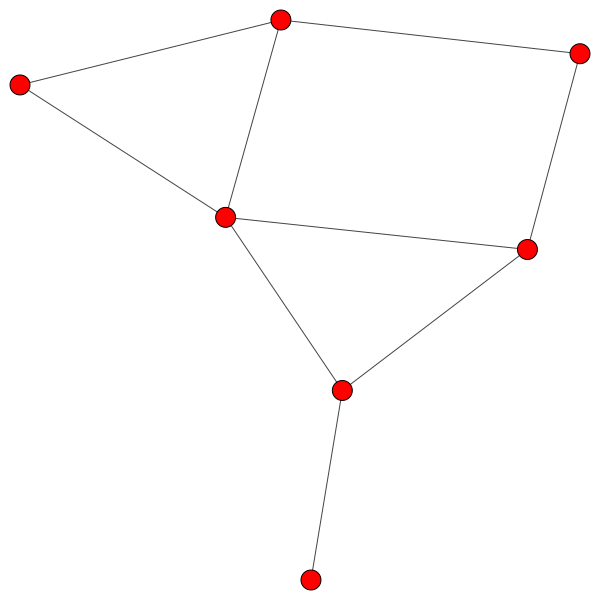

In [20]:
layout = g.layout_auto()
plot (g, layout = layout)

This is not very informative.  Let's show some of the vertex and edge attributes:

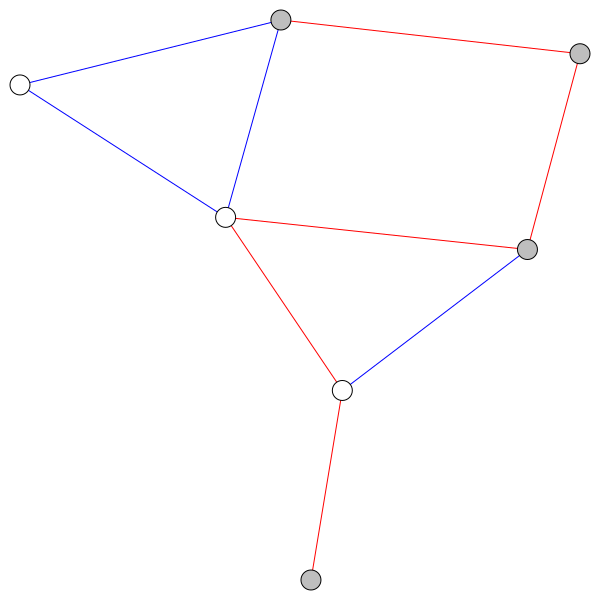

In [27]:
vx_color_dict = {"m": "gray", "f": "white"}
ed_color_dict = {True: "blue", False: "red"}

plot (g, layout = layout, vertex_color = [vx_color_dict[gender] for gender in g.vs["gender"]], \
      edge_color = [ed_color_dict[formal] for formal in g.es["is_formal"]])

Now let's show the names too:

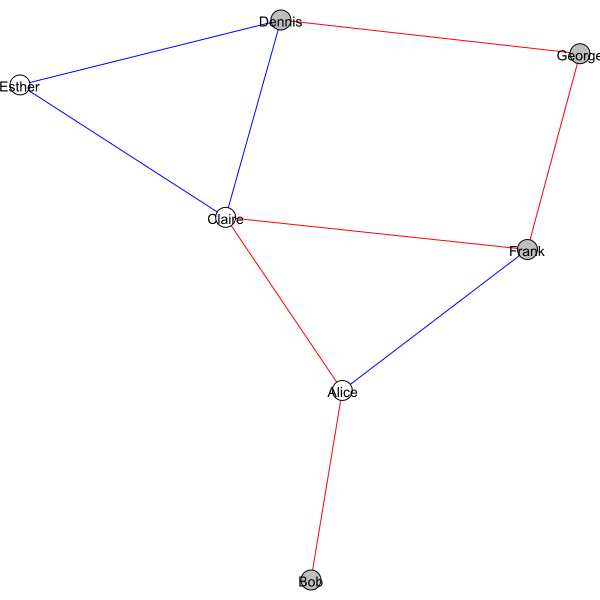

In [28]:
vx_color_dict = {"m": "gray", "f": "white"}
ed_color_dict = {True: "blue", False: "red"}

plot (g, layout = layout, \
      vertex_color = [vx_color_dict[gender] for gender in g.vs["gender"]], \
      vertex_label = g.vs["name"], \
      edge_color = [ed_color_dict[formal] for formal in g.es["is_formal"]])

This can also all be done much cleaner from the code perspective by setting the visual_style attributes.  Here we also add width  and resize the plot:

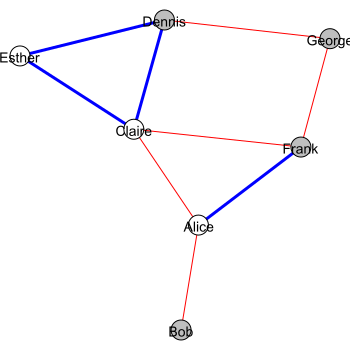

In [34]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [vx_color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["edge_color"] =  [ed_color_dict[formal] for formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (350, 350)
visual_style["margin"] = 20
plot(g,  **visual_style)

The two methods of defining the visual style are interchangeable.

In [7]:
#Degrees:
print g.degree()
print g.vs["name"]
print g.vs["gender"]
print g.vs["age"]

[3, 1, 4, 3, 2, 3, 2]
['Alice', 'Bob', 'Claire', 'Dennis', 'Esther', 'Frank', 'George']
['f', 'm', 'f', 'm', 'f', 'm', 'm']
[25, 31, 18, 47, 22, 23, 50]


From here, we can easily build the degree distribution.

We can also find the node with the maximum degree:

In [8]:
g.vs.select(_degree = g.maxdegree())["name"]

['Claire']

For more info on the **select** function, see the tutorial: http://igraph.org/python/doc/tutorial/tutorial.html

In [40]:
#Closeness Centrality:
g.closeness()

[0.6666666666666666,
 0.42857142857142855,
 0.75,
 0.6,
 0.5454545454545454,
 0.6666666666666666,
 0.5454545454545454]

In [35]:
#Betweenness Centrality:
g.betweenness()

[5.0, 0.0, 5.5, 1.5, 0.0, 2.5, 0.5]

In [37]:
#Eigenvector Centrality:
g.eigenvector_centrality()

[0.7111995450108001,
 0.24860112203602586,
 1.0,
 0.7513988779639738,
 0.6122047310756769,
 0.7860026990612518,
 0.5374015770252256]

In [36]:
#PageRank:
g.pagerank()

[0.1715187083669299,
 0.07002553879920158,
 0.20933537164407268,
 0.16151684644322287,
 0.11167544439518333,
 0.16265174994590004,
 0.11327634040548959]

## In Conclusion
Network analysis, social and otherwise, is an extremely interesting field.  The math may not be too complicated: it's all matrix algebra, but it can very rapidly grow: network nodes and edges can be weighted by multiple features; intra-network dynamics change all the time, leading to interesting patterns.  To be able to predict network behavior is where network analysis research is heading. 